<a href="https://colab.research.google.com/github/justcherie/QD_Img_capt_plus_KG/blob/master/graphCNN_100_2x256_dgl_500iter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
%cd /content/drive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
/content/drive


In [0]:
!pwd
%cd '/content/drive/My Drive/tensorflow-tutorial/quickdraw_tfrecord'
!pwd
!ls

/content/drive/My Drive/tensorflow-tutorial/quickdraw_tfrecord
/content/drive/My Drive/tensorflow-tutorial/quickdraw_tfrecord
/content/drive/My Drive/tensorflow-tutorial/quickdraw_tfrecord
archive				    dgl_nx_25_combined_15cats_train.bin
archive-codebug			    dgl_nx_400_3cats_combined_test.bin
dgl_combined_100_test.bin	    dgl_nx_400_3cats_combined_train.bin
dgl_combined_100_train.bin	    dgl_nx_400_combined_15cats_test.bin
dgl_nx_25_combined_15cats_test.bin  dgl_nx_400_combined_15cats_train.bin


In [0]:
  label_dict = { 'alarm': 1 , 'clock': 2 , 'ambulance': 3 , 'angel': 4 , 'ant': 5 , 'barn': 6 , 'basket': 7 , 
'bee': 8 , 'bicycle': 9 , 'book':  10, 'bridge': 11 , 'bulldozer': 12 , 'bus': 13 , 'butterfly': 14 ,
 'cactus': 15 , 'castle': 16 , 'cat': 17 , 'chair': 18 , 'couch': 19 , 'crab':  20, 'cruise': 21,
 'ship': 22 , 'dolphin': 23 , 'duck': 24 , 'elephant': 25 , 'eye': 26 , 'face': 27 , 'fan': 28 , 'fire hydrant': 29 ,
 'firetruck': 30 , 'flamingo': 31 , 'flower':  32, 'garden':  33, 'hand': 34 , 'hedgehog':  35, 'helicopter': 36 , 'kangaroo': 37 , 'key': 38 ,
 'lighthouse': 39 , 'lion': 40 , 'map': 41 , 'mermaid': 42 , 'octopus': 43 , 'owl':  44, 'paintbrush':  45, 'palm tree': 46 , 'parrot': 47,
 'passport': 48 , 'peas':  49, 'penguin': 50 , 'pig':  51, 'pineapple': 52 , 'postcard': 53 , 'power outlet': 54 , 'rabbit':  55, 'radio': 56 ,
 'rain': 57 , 'rhinoceros':  58, 'roller coaster': 59 , 'sandwich': 60 , 'scorpion': 61, 'sea turtle':  62, 'sheep':  63, 'skull':  64, 'snail':  65,
 'snowflake':  66, 'speedboat': 67 , 'spider':  68, 'strawberry': 69 , 'swan': 70 , 'swing set': 71 , 'tennis racquet':  72, 'the mona lisa': 73 ,
 'toothbrush': 74 , 'truck': 75 , 'whale':  76, 'windmill': 77, 'airplane': 78, 'mosquito':79, 'yoga':80 }

In [0]:
# reference: https://docs.dgl.ai/tutorials/basics/4_batch.html

!pip install dgl
"""
.. currentmodule:: dgl

Batched Graph Classification with DGL
=====================================

**Author**: `Mufei Li <https://github.com/mufeili>`_,
`Minjie Wang <https://jermainewang.github.io/>`_,
`Zheng Zhang <https://shanghai.nyu.edu/academics/faculty/directory/zheng-zhang>`_.

Graph classification is an important problem
with applications across many fields -- bioinformatics, chemoinformatics, social
network analysis, urban computing and cyber-security. Applying graph neural
networks to this problem has been a popular approach recently (
`Ying et al., 2018 <https://arxiv.org/abs/1806.08804>`_,
`Cangea et al., 2018 <https://arxiv.org/abs/1811.01287>`_,
`Knyazev et al., 2018 <https://arxiv.org/abs/1811.09595>`_,
`Bianchi et al., 2019 <https://arxiv.org/abs/1901.01343>`_,
`Liao et al., 2019 <https://arxiv.org/abs/1901.01484>`_,
`Gao et al., 2019 <https://openreview.net/forum?id=HJePRoAct7>`_).

This tutorial demonstrates:
 * batching multiple graphs of variable size and shape with DGL
 * training a graph neural network for a simple graph classification task
"""

###############################################################################
# Simple Graph Classification Task
# --------------------------------
# In this tutorial, we will learn how to perform batched graph classification
# with dgl via a toy example of classifying 8 types of regular graphs as below:
#
# .. image:: https://s3.us-east-2.amazonaws.com/dgl.ai/tutorial/batch/dataset_overview.png
#     :align: center
#
# We implement a synthetic dataset :class:`data.MiniGCDataset` in DGL. The dataset has 8
# different types of graphs and each class has the same number of graph samples.

from dgl.data import MiniGCDataset
import matplotlib.pyplot as plt
import networkx as nx
import os


     |████████████████████████████████| 2.4MB 6.6MB/s 


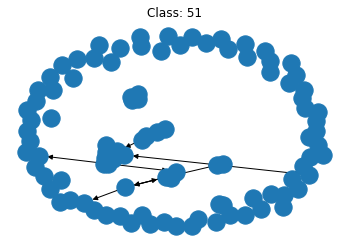

In [0]:
from dgl.data.utils import load_graphs
output_path = "/content/drive/My Drive/tensorflow-tutorial/quickdraw_tfrecord/"
file_name = "dgl_combined_100_train.bin"
glist, glabel_dict = load_graphs(os.path.join(output_path, file_name))

i=2
temp=tuple((glist[i],glabel_dict['label'].tolist()[i]))
#graph, label = dataset[0]
graph, label = temp
fig, ax = plt.subplots()
nx.draw(graph.to_networkx(), ax=ax)
ax.set_title('Class: {:d}'.format(label))
plt.show()


In [0]:
###############################################################################
# Form a graph mini-batch
# -----------------------
# To train neural networks more efficiently, a common practice is to **batch**
# multiple samples together to form a mini-batch. Batching fixed-shaped tensor
# inputs is quite easy (for example, batching two images of size :math:`28\times 28`
# gives a tensor of shape :math:`2\times 28\times 28`). By contrast, batching graph inputs
# has two challenges:
#
# * Graphs are sparse.
# * Graphs can have various length (e.g. number of nodes and edges).
#
# To address this, DGL provides a :func:`dgl.batch` API. It leverages the trick that
# a batch of graphs can be viewed as a large graph that have many disjoint
# connected components. Below is a visualization that gives the general idea:
#
# .. image:: https://s3.us-east-2.amazonaws.com/dgl.ai/tutorial/batch/batch.png
#     :width: 400pt
#     :align: center
#
# We define the following ``collate`` function to form a mini-batch from a given
# list of graph and label pairs.

import dgl

def collate(samples):
    # The input `samples` is a list of pairs
    #  (graph, label).
    graphs, labels = map(list, zip(*samples))
    batched_graph = dgl.batch(graphs)
    return batched_graph, torch.tensor(labels)

###############################################################################
# The return type of :func:`dgl.batch` is still a graph (similar to the fact that
# a batch of tensors is still a tensor). This means that any code that works
# for one graph immediately works for a batch of graphs. More importantly,
# since DGL processes messages on all nodes and edges in parallel, this greatly
# improves efficiency.
#
# Graph Classifier
# ----------------
# The graph classification can be proceeded as follows:
#
# .. image:: https://s3.us-east-2.amazonaws.com/dgl.ai/tutorial/batch/graph_classifier.png
#
# From a batch of graphs, we first perform message passing/graph convolution
# for nodes to "communicate" with others. After message passing, we compute a
# tensor for graph representation from node (and edge) attributes. This step may
# be called "readout/aggregation" interchangeably. Finally, the graph
# representations can be fed into a classifier :math:`g` to predict the graph labels.
#

In [0]:
# Graph Convolution
# -----------------
# Our graph convolution operation is basically the same as that for GCN (checkout our 
# `tutorial <https://docs.dgl.ai/tutorials/models/1_gnn/1_gcn.html>`_). The only difference is
# that we replace :math:`h_{v}^{(l+1)} = \text{ReLU}\left(b^{(l)}+\sum_{u\in\mathcal{N}(v)}h_{u}^{(l)}W^{(l)}\right)` by
# :math:`h_{v}^{(l+1)} = \text{ReLU}\left(b^{(l)}+\frac{1}{|\mathcal{N}(v)|}\sum_{u\in\mathcal{N}(v)}h_{u}^{(l)}W^{(l)}\right)`.
# The replacement of summation by average is to balance nodes with different
# degrees, which gives a better performance for this experiment.
#
# Note that the self edges added in the dataset initialization allows us to
# include the original node feature :math:`h_{v}^{(l)}` when taking the average.

import dgl.function as fn
import torch
import torch.nn as nn


# Sends a message of node feature h.
msg = fn.copy_src(src='h', out='m')

def reduce(nodes):
    """Take an average over all neighbor node features hu and use it to
    overwrite the original node feature."""
    accum = torch.mean(nodes.mailbox['m'], 1)
    return {'h': accum}

class NodeApplyModule(nn.Module):
    """Update the node feature hv with ReLU(Whv+b)."""
    def __init__(self, in_feats, out_feats, activation):
        super(NodeApplyModule, self).__init__()
        self.linear = nn.Linear(in_feats, out_feats)
        self.activation = activation

    def forward(self, node):
        h = self.linear(node.data['h'])
        h = self.activation(h)
        return {'h' : h}

class GCN(nn.Module):
    def __init__(self, in_feats, out_feats, activation):
        super(GCN, self).__init__()
        self.apply_mod = NodeApplyModule(in_feats, out_feats, activation)

    def forward(self, g, feature):
        # Initialize the node features with h.
        g.ndata['h'] = feature
        g.update_all(msg, reduce)
        g.apply_nodes(func=self.apply_mod)
        return g.ndata.pop('h')


In [0]:
###############################################################################
# Readout and Classification
# --------------------------
# For this demonstration, we consider initial node features to be their degrees.
# After two rounds of graph convolution, we perform a graph readout by averaging
# over all node features for each graph in the batch
#
# .. math::
#
#    h_g=\frac{1}{|\mathcal{V}|}\sum_{v\in\mathcal{V}}h_{v}
#
# In DGL, :func:`dgl.mean_nodes` handles this task for a batch of
# graphs with variable size. We then feed our graph representations into a
# classifier with one linear layer to obtain pre-softmax logits.

import torch.nn.functional as F


class Classifier(nn.Module):
    def __init__(self, in_dim, hidden_dim, n_classes):
        super(Classifier, self).__init__()

        self.layers = nn.ModuleList([
            GCN(in_dim, hidden_dim, F.relu),
            GCN(hidden_dim, hidden_dim, F.relu)])
        self.classify = nn.Linear(hidden_dim, n_classes)

    def forward(self, g):
        # For undirected graphs, in_degree is the same as
        # out_degree.
        h = g.in_degrees().view(-1, 1).float()
        for conv in self.layers:
            h = conv(g, h)
        g.ndata['h'] = h
        hg = dgl.mean_nodes(g, 'h')
        return self.classify(hg)


In [0]:
###############################################################################
# Setup and Training
# ------------------
# We create a synthetic dataset of :math:`400` graphs with :math:`10` ~
# :math:`20` nodes. :math:`320` graphs constitute a training set and
# :math:`80` graphs constitute a test set.

import torch.optim as optim
from torch.utils.data import DataLoader

# Create training and test sets.
#trainset = MiniGCDataset(320, 10, 20)
#testset = MiniGCDataset(80, 10, 20)

from dgl.data.utils import load_graphs
output_path = "/content/drive/My Drive/tensorflow-tutorial/quickdraw_tfrecord"
file_name_train = "dgl_combined_100_train.bin"
glist_train, label_dict_train = load_graphs(os.path.join(output_path, file_name_train))
#i=2
#temp=tuple((glist[i],label_dict['label'].tolist()[i]))

import numpy as np
#trainset = tuple((glist_train,label_dict_train['label'].tolist()))
#trainset = np.array(([glist_train, label_dict_train['label'].tolist()])
trainset = list( zip( glist_train, label_dict_train['label'].tolist() ))

file_name_test = "dgl_combined_100_test.bin"
glist_test, label_dict_test = load_graphs(os.path.join(output_path, file_name_test))
testset = list( zip( glist_test, label_dict_test['label'].tolist() ))


In [0]:

# Use PyTorch's DataLoader and the collate function
# defined before.
data_loader = DataLoader(trainset, batch_size=32, shuffle=True,
                         collate_fn=collate)

# Create model
#trainset_num_classes = len(np.unique(trainset[1]))
#from operator import itemgetter 
#trainset_num_classes = len(np.unique(list(map(itemgetter(1), trainset))))
trainset_num_classes = (len(label_dict.values())+1)
#model = Classifier(1, 256, trainset.num_classes)
model = Classifier(1, 256, trainset_num_classes)

loss_func = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
model.train()

epoch_losses = []
num_epoches = 500
weights = []
labels_batch_run = []
for epoch in range(num_epoches):
    epoch_loss = 0
    for iter, (bg, label) in enumerate(data_loader):
        prediction = model(bg)
        loss = loss_func(prediction, label)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        epoch_loss += loss.detach().item()
       
    epoch_loss /= (iter + 1)
    print('Epoch {}, loss {:.4f}'.format(epoch, epoch_loss))
    epoch_losses.append(epoch_loss)

###############################################################################
# The learning curve of a run is presented below:

plt.title('cross entropy averaged over minibatches')
plt.plot(epoch_losses)
plt.show()


NameError: ignored

In [0]:
###############################################################################
# The trained model is evaluated on the test set created. Note that for deployment
# of the tutorial, we restrict our running time and you are likely to get a higher
# accuracy (:math:`80` % ~ :math:`90` %) than the ones printed below.

model.eval()
# Convert a list of tuples to two lists
test_X, test_Y = map(list, zip(*testset))
label_Y = test_Y
test_bg = dgl.batch(test_X)

test_Y = torch.tensor(test_Y).float().view(-1, 1)
probs_Y = torch.softmax(model(test_bg), 1)
sampled_Y = torch.multinomial(probs_Y, 1)
argmax_Y = torch.max(probs_Y, 1)[1].view(-1, 1)
print('Accuracy of sampled predictions on the test set: {:.4f}%'.format(
    (test_Y == sampled_Y.float()).sum().item() / len(test_Y) * 100))
print('Accuracy of argmax predictions on the test set: {:4f}%'.format(
    (test_Y == argmax_Y.float()).sum().item() / len(test_Y) * 100))


   

In [0]:

def plot_tsne(title,labels,word_tsne):
    import matplotlib.pyplot as plt
    
   
    plt.figure( figsize=[10,10])
    for i in range(len(word_tsne)):
        x = word_tsne[i,0]
        y = word_tsne[i,1]
#        plt.scatter(x, y, marker='x', color='red')
        plt.scatter(x, y, marker='o')
#        plt.text(x+0.3, y+0.3, labels[i], fontsize=9)
        plt.title(title)
    plt.show()
    
    return

from sklearn.manifold import TSNE
#layer_tsne = TSNE(n_components=2).fit_transform(model(test_bg).tolist())
#layer_tsne = TSNE(n_components=2).fit_transform(model(test_bg).tolist())

#plot_tsne("Y prior softmax",label_Y, layer_tsne)

eval_list = []
for graph in test_X:
    eval_list.append(model.forward(graph).tolist())
    
layer_tsne = TSNE(n_components=2).fit_transform(eval_list)
#plot_tsne("Y prior softmax",label_Y, layer_tsne)

label_Y_text = []
for i in label_Y:
    #label_Y_text.append(label_dict[label_Y[i]])
    
    label_Y_text.append( list(label_dict.keys())[list(label_dict.values()).index(label_Y[i])] )

import seaborn as sns
#iris = sns.load_dataset('iris')
sns.scatterplot(x=layer_tsne[:,0], y=layer_tsne[:,1],
              hue=label_Y_text)